# Test of the LASTENSequence
The generator for the LASTEN data set is tested here.

# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import importlib
import lastengen

import numpy as np

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Settings
Set the plot settings

In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

# Data
Import training images

In [3]:
path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/train'
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/validation'
path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/test'

# Data Preparation
The generator sequence for training is built.

In [4]:
width = 384
height = 384
grid_width = 18
grid_height = 18

importlib.reload(lastengen)

train_gen = lastengen.LASTENSequence(path_train,
                           batch_size=10,
                           image_ids=None,
                           preprocess_input=pre_une,
                           shuffle=True,
                           augment=True,
                           width=width,
                           height=height)


In [5]:
batch_index = 0
batch_index = 0

X, y = train_gen[batch_index]

image = X[batch_index]
mask = y['segmentation'][batch_index]
keypoints = y['keypoints'][batch_index]

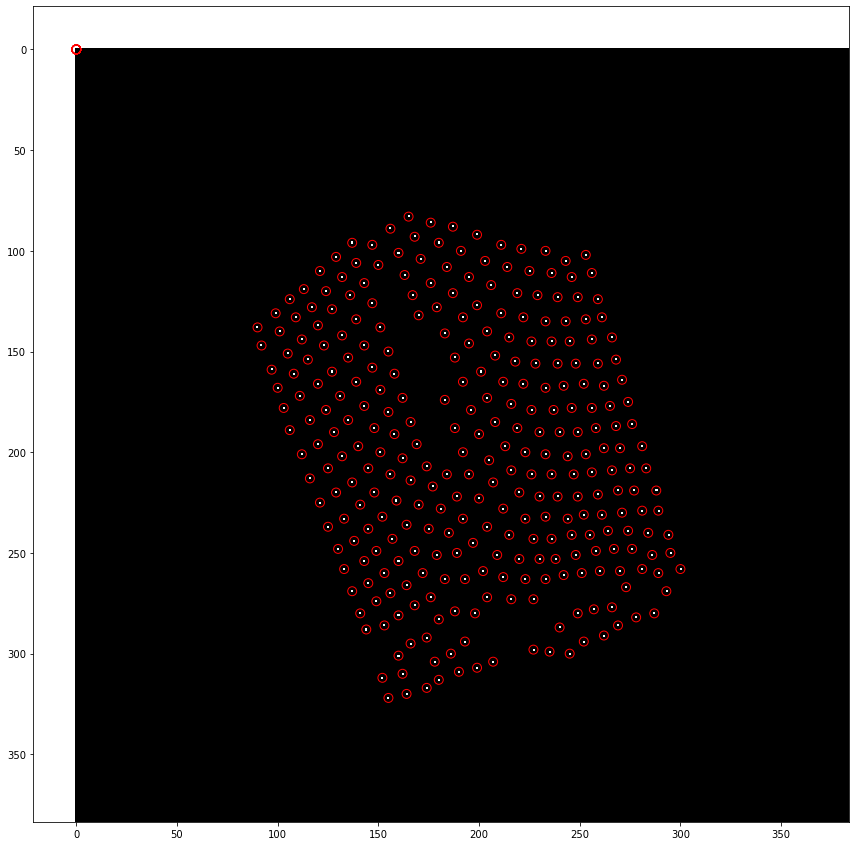

In [7]:
plt.clf()
plt.imshow(mask[:,:,0], cmap="gray")

x_list = []
y_list = []

for index in range(0, 18*18):
    x_index = index * 2 
    
    x = (keypoints[x_index] - 1) * width
    y = (keypoints[x_index + 1] - 1) * height
    
    x_list.append(x)
    y_list.append(y)
    
    
plt.scatter(x_list, y_list,s=80,facecolors='none', edgecolors='r')